statistics-resampling-online 
============

Interact with Octave and the statistics-resampling package online in Jupyter Notebook with Binder. All commands are interpreted by Octave.  Since this is a [MetaKernel](https://github.com/Calysto/metakernel), a standard set of magics are available.  Help on commands is available using the `%help` magic or using `?` with a command. For the best experience, run this notebook in [JupyterLab](https://mybinder.org/v2/gh/acpennlab/statistics-resampling-online/master?labpath=statistics-resampling.ipynb). 

The code cells and their output below illustrate some examples of loading data and then performing analysis using functions from the **statistics-resampling** package. Follow the links in the **Quick start** section of the [README page](https://gnu-octave.github.io/statistics-resampling/readme.html), or on the [Function reference page](https://gnu-octave.github.io/statistics-resampling/function_reference), to find further examples. The example data files provided, **data1.tsv** and **data2.csv**, can be edited directly in this instance of JupyterLab. You could consider forking the statistics-resampling-online [GitHub repository](https://github.com/acpennlab/statistics-resampling-online) and customizing the notebook (\*.ipynb) and data (\*.tsv and \*.csv) files to document and publish your data analysis project.  

A small selection of packages come already installed and loaded. Visit [GNU Octave Packages](https://gnu-octave.github.io/packages/) to see what other packages are available and how to install them. To load a newly installed package called `<package-name>`, use the command `pkg load <package-name>`. To preview demonstration number `X` of a function called `<function-name>`, use the command `demo ('<function-name>', X)`. To get more information about a particular function called `<function-name>`, use the command `help <function-name>`.

In [ ]:
# Run this code cell if you wish to know:
# 1) The version of GNU Octave that we are running
# 2) What packages (and their version) are already installed (and loaded*) here
# 3) More information about the statistics-resampling package
ver('Octave');
pkg list;
pkg describe -verbose statistics-resampling

**Example 1** (below): Bootstrap confidence intervals for the correlation coefficient using `bootci` on (bivariate) data (in wide format) loaded from **data1.tsv**. Application of `randtest2` for comparing the mean of paired samples is also illustrated.

In [1]:
# Load data from tab-separated-value (TSV) file (i.e. tab-delimited text file) with header
[before, after] = textread ('data1.tsv', '%f %f', 'Delimiter', '', 'HeaderLines', 1);

# 95% BCa bootstrap confidence intervals for the correlation coefficient
ci = bootci (1999, @cor, before, after)

# Randomization test for comparing means of paired samples
pval = randtest2 (before, after, true, 10000, @(A, B) mean (A) - mean (B))

ci =

   0.5158
   0.8630

pval = 3.7879e-04


**Example 2** (below): Bootstrap two-way ANOVA (Type I) using `bootlm` with data (in long format) loaded from **data2.csv**.

ANOVA SUMMARY with effect of gender averaged over levels of degree
F(1,18) = 87.20, p = 0.0001 for the model: salary ~ 1 + gender
F(1,18) = 10.97, p = 0.00495 for the model: salary ~ 1 + gender + degree
F(1,18) = 0.42, p = 0.567 for the model: salary ~ 1 + gender + degree + gender:degree

MODEL FORMULA (based on Wilkinson's notation):

salary ~ 1 + gender + degree + gender:degree

MODEL ESTIMATED MARGINAL MEANS

name                                   mean        CI_lower    CI_upper        N
--------------------------------------------------------------------------------
f, 1                                   +25.00      +24.03      +26.07          8
m, 1                                   +27.00      +25.11      +29.00          3
f, 0                                   +17.00      +15.20      +19.22          4
m, 0                                   +20.00      +19.02      +21.03          7



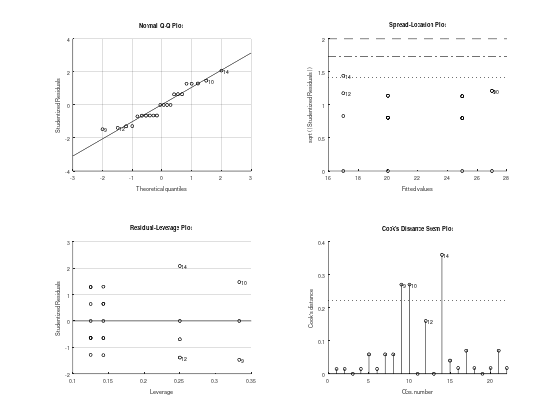

In [1]:
# Load data from comma-separated-value (CSV) file with header
[degree, gender, salary] = textread ('data2.csv', '%u %s %f', 'Delimiter', ',', 'HeaderLines', 1);

# Bootstrap ANOVA
[STATS, BOOTSTAT, AOVSTAT] = bootlm (salary, {degree, gender}, 'model', ...
                             'full', 'display', 'off', 'varnames', ...
                             {'gender', 'degree'}, 'seed', 1);

# Report ANOVA results
fprintf ('ANOVA SUMMARY with effect of gender averaged over levels of degree\n')
for i = 1:numel(AOVSTAT.MODEL)
  fprintf ('F(%u,%u) = %.2f, p = %.3g for the model: %s\n', ...
           AOVSTAT.DF(i), AOVSTAT.DFE, AOVSTAT.F(i), ...
           AOVSTAT.PVAL(i), AOVSTAT.MODEL{i});
end

# Calculate estimate marginal means and credible intervals by bayesian bootstrap
STATS = bootlm (salary, {gender, degree}, 'model', 'full', ...
                        'display', 'on', 'varnames', ...
                        {'gender', 'degree'}, 'dim', [1, 2], ...
                        'method', 'bayesian','prior', 'auto');